# Visualizations and first explorative analysis

https://seaborn.pydata.org/tutorial/categorical.html

In [5]:
import pandas as pd
import seaborn as sns
from utils import preprocessing, plotting

### Load data and Preprocess

In [6]:
# Load data
questions = pd.read_csv('data/question_data.csv', sep=';')
questions = questions.set_index('Unnamed: 0')  # set first column (question number) as index
data = pd.read_parquet('data/train.parquet')


In [7]:
# questions
selected_questions = ['q212813'] + preprocessing.top_k_questions(keyword='descriptive', k=15, questions_df=questions, data=data)
unordered_categories, ordered_categories = preprocessing.get_categories(selected_questions, questions, {'q20930', 'q77', 'q80', 'q79'})
feature_target_df = preprocessing.preprocess(data[selected_questions], unordered_categories, ordered_categories)


selected questions:  ['Do you like watching foreign movies with subtitles?'
 'Which type of wine would you prefer to drink outside of a meal, such as for leisure?'
 'Do you enjoy intense intellectual conversations?'
 'Have you smoked a cigarette in the last 6 months?'
 'How frequently do you drink alcohol?' 'Rate your self-confidence:'
 'How often do you keep your promises?'
 'How often are you open with your feelings?'
 "What's your deal with harder drugs (stuff beyond pot)?"
 'Are you happy with your life?'
 "What's your relationship with marijuana?"
 'If you had to name your greatest motivation in life thus far, what would it be?'
 'How often do you brush your teeth?'
 'How important are your political beliefs to you?'
 'Do you often make jokes that offend more uptight people?']


In [8]:
display(feature_target_df)

,q212813,q416235,q85419,q358084,q501,q77,q20930,q29829,q35660,q80,q4018,q79,q18834,q12970,q212814,q23834
index,,,,,,,,,,,,,,,,
8701,Liberal / Left-wing,Yes,Rosé (such as White Zinfindel).,Yes,No,Very often,Higher than average,Always,Usually,I never do drugs.,Yes,Never.,Knowledge,Twice or more a day,A little important,No
31844,Centrist,Yes,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,Average,Whenever possible,Usually,I never do drugs.,Yes,"I smoked in the past, but no longer.",Knowledge,Once a day,Somewhat important,No
39046,Centrist,Can't answer without a subtitle,Rosé (such as White Zinfindel).,Yes,No,Sometimes,Average,Whenever possible,Usually,I never do drugs.,Yes,I smoke occasionally.,Love,Twice or more a day,Somewhat important,No
21628,Other,Can't answer without a subtitle,"Red (such as Merlot, Cabernet, Shiraz).",Yes,Yes,Rarely,Higher than average,Whenever possible,Usually,I never do drugs.,Yes,Never.,Knowledge,Twice or more a day,A little important,No
51271,Other,Can't answer without a subtitle,"Red (such as Merlot, Cabernet, Shiraz).",Yes,Yes,Sometimes,Higher than average,Always,Usually,I never do drugs.,Yes,I smoke occasionally.,Knowledge,Twice or more a day,Somewhat important,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27366,Other,No,Rosé (such as White Zinfindel).,Yes,No,Sometimes,Higher than average,Always,Usually,"I've done drugs in the past, but no longer.",Yes,"I smoked in the past, but no longer.",Expression,Twice or more a day,Not at all important,No
12786,Other,Can't answer without a subtitle,Rosé (such as White Zinfindel).,Yes,No,Never,Higher than average,Whenever possible,Rarely,I never do drugs.,Yes,Never.,Love,Twice or more a day,Not at all important,Yes
67652,Other,Can't answer without a subtitle,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,Below average,Always,Rarely,I never do drugs.,Yes,Never.,Knowledge,Once a day,A little important,No


## Visualizations

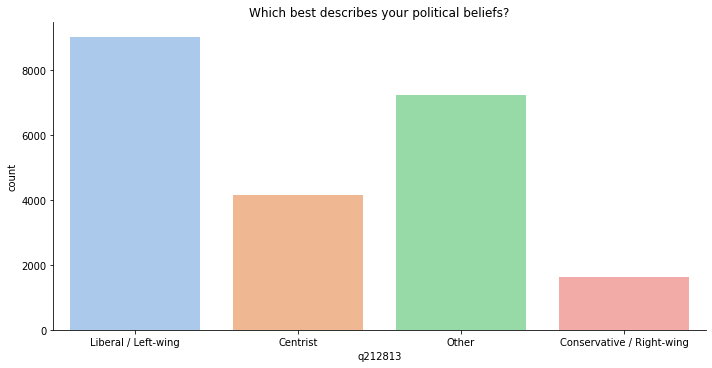

In [9]:
sns.catplot(data=feature_target_df, x='q212813', kind="count", palette="pastel", aspect=2).set(title=questions.loc['q212813', 'text'])

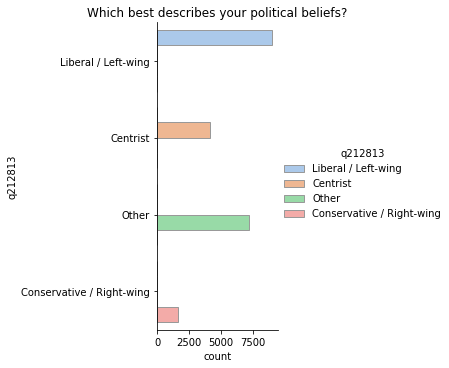

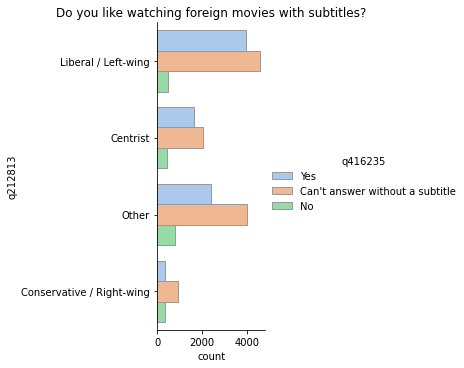

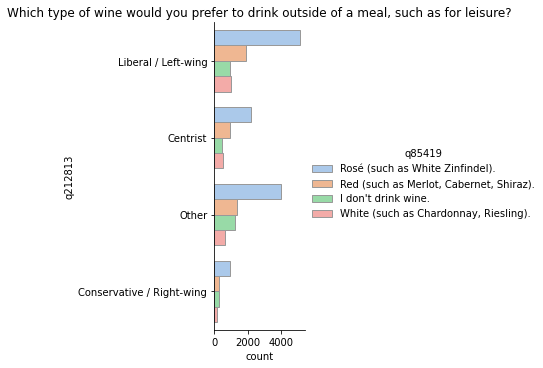

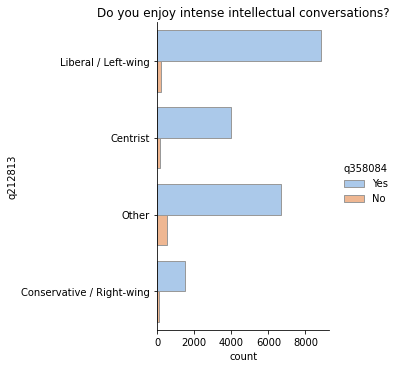

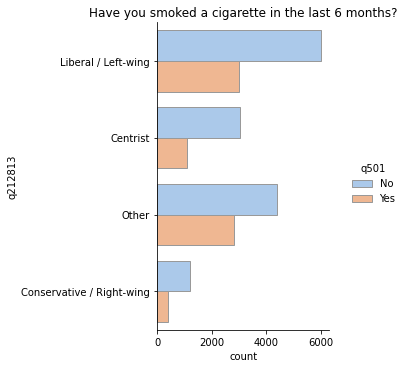

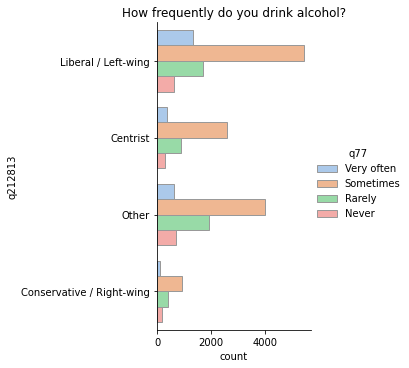

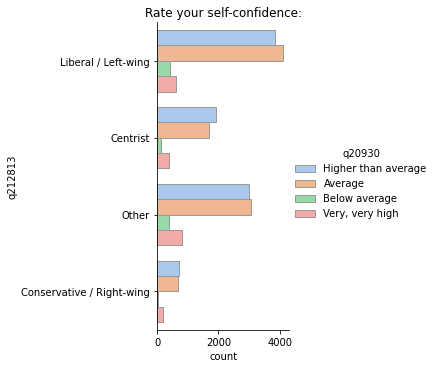

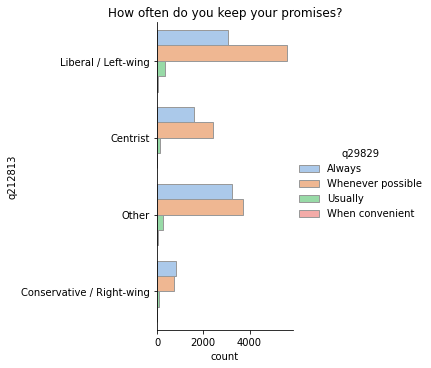

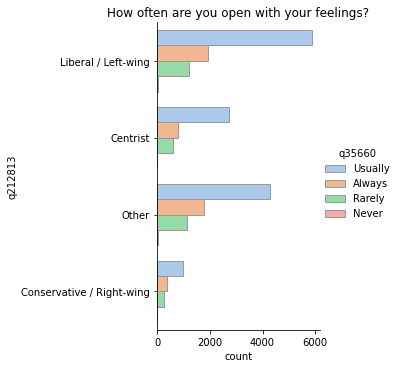

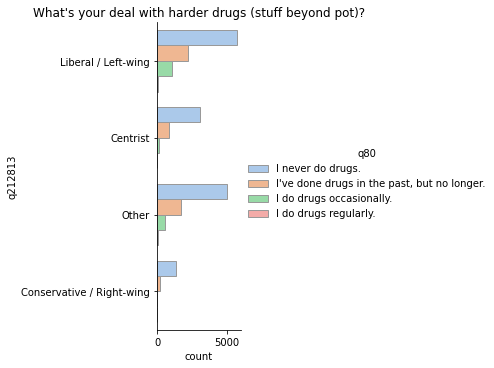

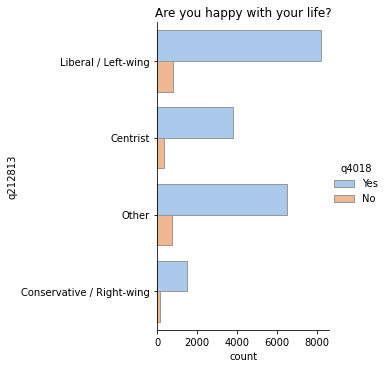

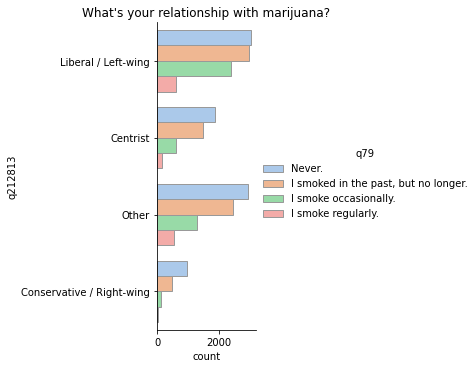

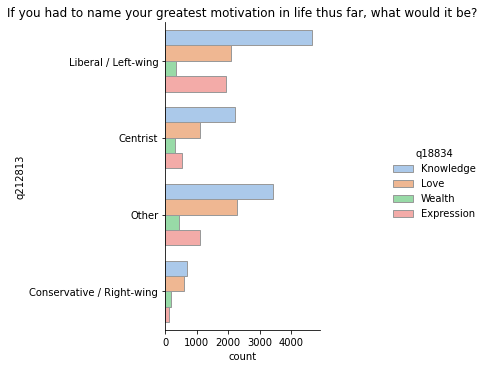

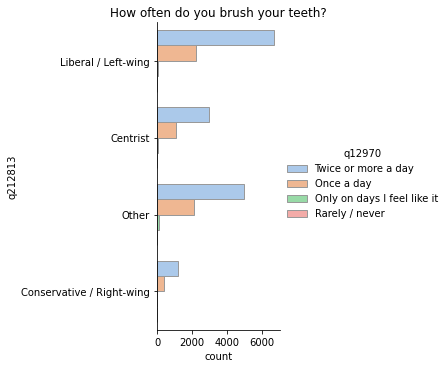

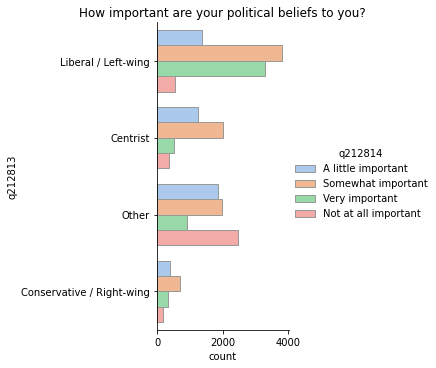

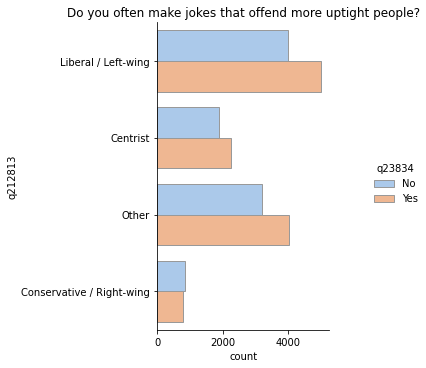

In [10]:
for question in selected_questions:
    plotting.plot_question_distribution(question, feature_target_df, questions)


In [26]:
# number of subjects who answered all of the questions based on number of questions
n_subjects = []
for k in range(1, 10):
    print(k)
    selected_questions = preprocessing.top_k_questions(keyword='descriptive', k=k, questions_df=questions, data=data, print_q=False)
    n_subjects.append(preprocessing.preprocess(data[selected_questions]).shape[0])

1
2
3
4
5
6
7
8
9


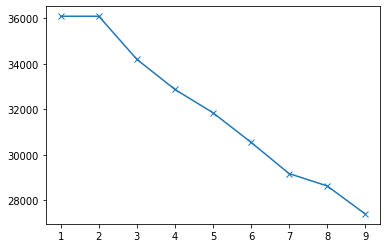

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(1,10), n_subjects, 'x-')
